<a href="https://colab.research.google.com/github/joonin03/ai-agent-with-groq/blob/main/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
#객실 등급 별 생존률
pclass_survival = df.groupby('Pclass')['Survived'].mean()
display(pclass_survival)

,Survived
Pclass,
1,0.467290
2,0.322581
3,0.330275


In [ ]:
#성별 별 생존률
sex_survival = df.groupby('Sex')['Survived'].mean()
display(sex_survival)

,Survived
Sex,
female,1.0
male,0.0


In [ ]:
# Females who did not survive
female_not_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]
print("Females who did not survive:")
display(female_not_survived)

# Males who survived
male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]
print("\nMales who survived:")
display(male_survived)

Females who did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked



Males who survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
#동승자 수 별 생존률
df['Mate'] = df['SibSp']+df['Parch']

mate_sum = df.groupby('Mate')['PassengerId'].count()
display(mate_sum)
print('\nmate survival')
mate_survival = df.groupby('Mate')['Survived'].mean()
display(mate_survival)

,PassengerId
Mate,
0,253
1,74
2,57
3,14
4,7
5,3
6,4
7,2
10,4



mate survival


,Survived
Mate,
0,0.268775
1,0.486486
2,0.526316
3,0.714286
4,0.285714
5,0.666667
6,0.250000
7,0.500000
10,0.500000


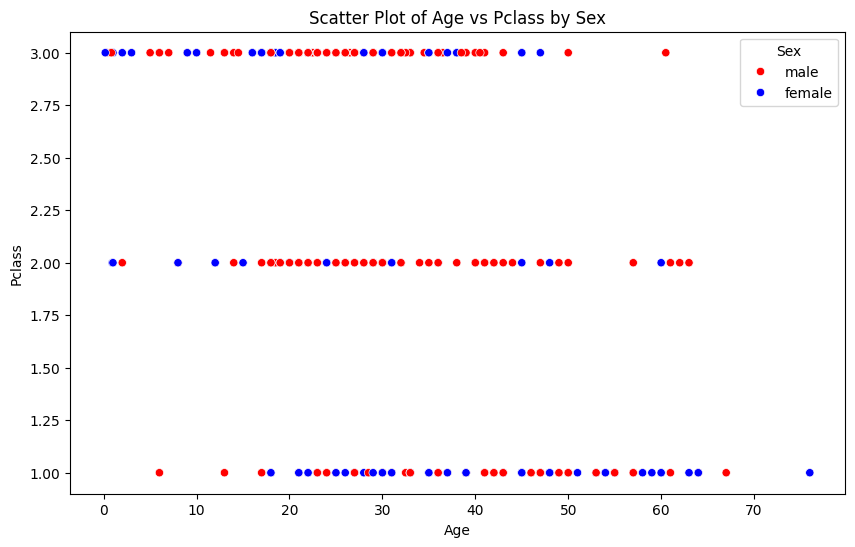

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Pclass', hue='Sex', palette={'male': 'red', 'female': 'blue'})
plt.title('Scatter Plot of Age vs Pclass by Sex')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.show()